In [1]:
import logging
import warnings

import pandas as pd

from technical_index.binance import get_futures_market_data
from technical_index.index import build_quantitative_analysis
from technical_index.plot import PlotConfig, plot_candlestick_with_indicators

# 过滤pandas警告
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# 设置日志级别为ERROR，只显示错误信息
logging.basicConfig(level=logging.ERROR)

/Users/gx/ws/jupyter/strategy/technical-index/venv/lib/python3.13/site-packages/pandas_ta/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
# 获取ETHUSDT的1小时K线数据，限制500条
df = get_futures_market_data("ETHUSDT", "1d", limit=500)
df.tail(5)

,Open,High,Low,Close,Volume,Number_Of_Trades,Taker_Buy_Base_Asset_Volume,Taker_Buy_Quote_Asset_Volume
Open_Time,,,,,,,,
2025-07-17,3370.54,3524.00,3311.00,3476.65,8831516.299,9706393,4351549.085,1.488117e+10
2025-07-18,3476.66,3674.43,3458.00,3546.36,9940209.861,11072600,4848998.776,1.740612e+10
2025-07-19,3546.36,3608.00,3505.00,3591.31,3451544.417,4428185,1699122.083,6.052632e+09
2025-07-20,3591.32,3826.00,3578.05,3755.67,7235342.352,7720041,3552660.143,1.321066e+10
2025-07-21,3755.68,3756.49,3700.19,3744.14,640279.830,937899,307387.282,1.146414e+09


In [9]:
# 计算技术指标
print("正在计算技术指标...")
df_with_indicators = build_quantitative_analysis(df, ["sma", "macd", "rsi", "adx"], ma_periods=(5, 10, 20, 50))
df_with_indicators.tail(5)

正在计算技术指标...


,Open,High,Low,Close,Volume,Number_Of_Trades,Taker_Buy_Base_Asset_Volume,Taker_Buy_Quote_Asset_Volume,SMA_5,SMA_10,SMA_20,SMA_50,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,ADX_14,DMP_14,DMN_14
Open_Time,,,,,,,,,,,,,,,,,,,
2025-07-17,3370.54,3524.00,3311.00,3476.65,8831516.299,9706393,4351549.085,1.488117e+10,3193.490,3019.854,2765.6350,2619.1504,207.664653,80.425523,127.239130,83.550099,32.377306,44.337712,7.574095
2025-07-18,3476.66,3674.43,3458.00,3546.36,9940209.861,11072600,4848998.776,1.740612e+10,3308.688,3113.093,2821.2130,2637.4716,234.915879,86.141399,148.774479,84.606592,35.388899,46.814052,6.828845
2025-07-19,3546.36,3608.00,3505.00,3591.31,3451544.417,4428185,1699122.083,6.052632e+09,3424.498,3195.454,2875.8160,2658.7052,257.175205,86.720580,170.454625,85.263807,38.185379,44.566626,6.501009
2025-07-20,3591.32,3826.00,3578.05,3755.67,7235342.352,7720041,3552660.143,1.321066e+10,3548.108,3275.959,2939.3845,2683.2770,284.795416,91.472633,193.322783,87.384713,41.103023,49.365178,5.781463
2025-07-21,3755.68,3756.49,3700.19,3744.14,640279.830,937899,307387.282,1.146414e+09,3622.826,3354.680,3006.4090,2707.4020,302.269878,87.157676,215.112202,86.444789,43.812264,48.064321,5.629112


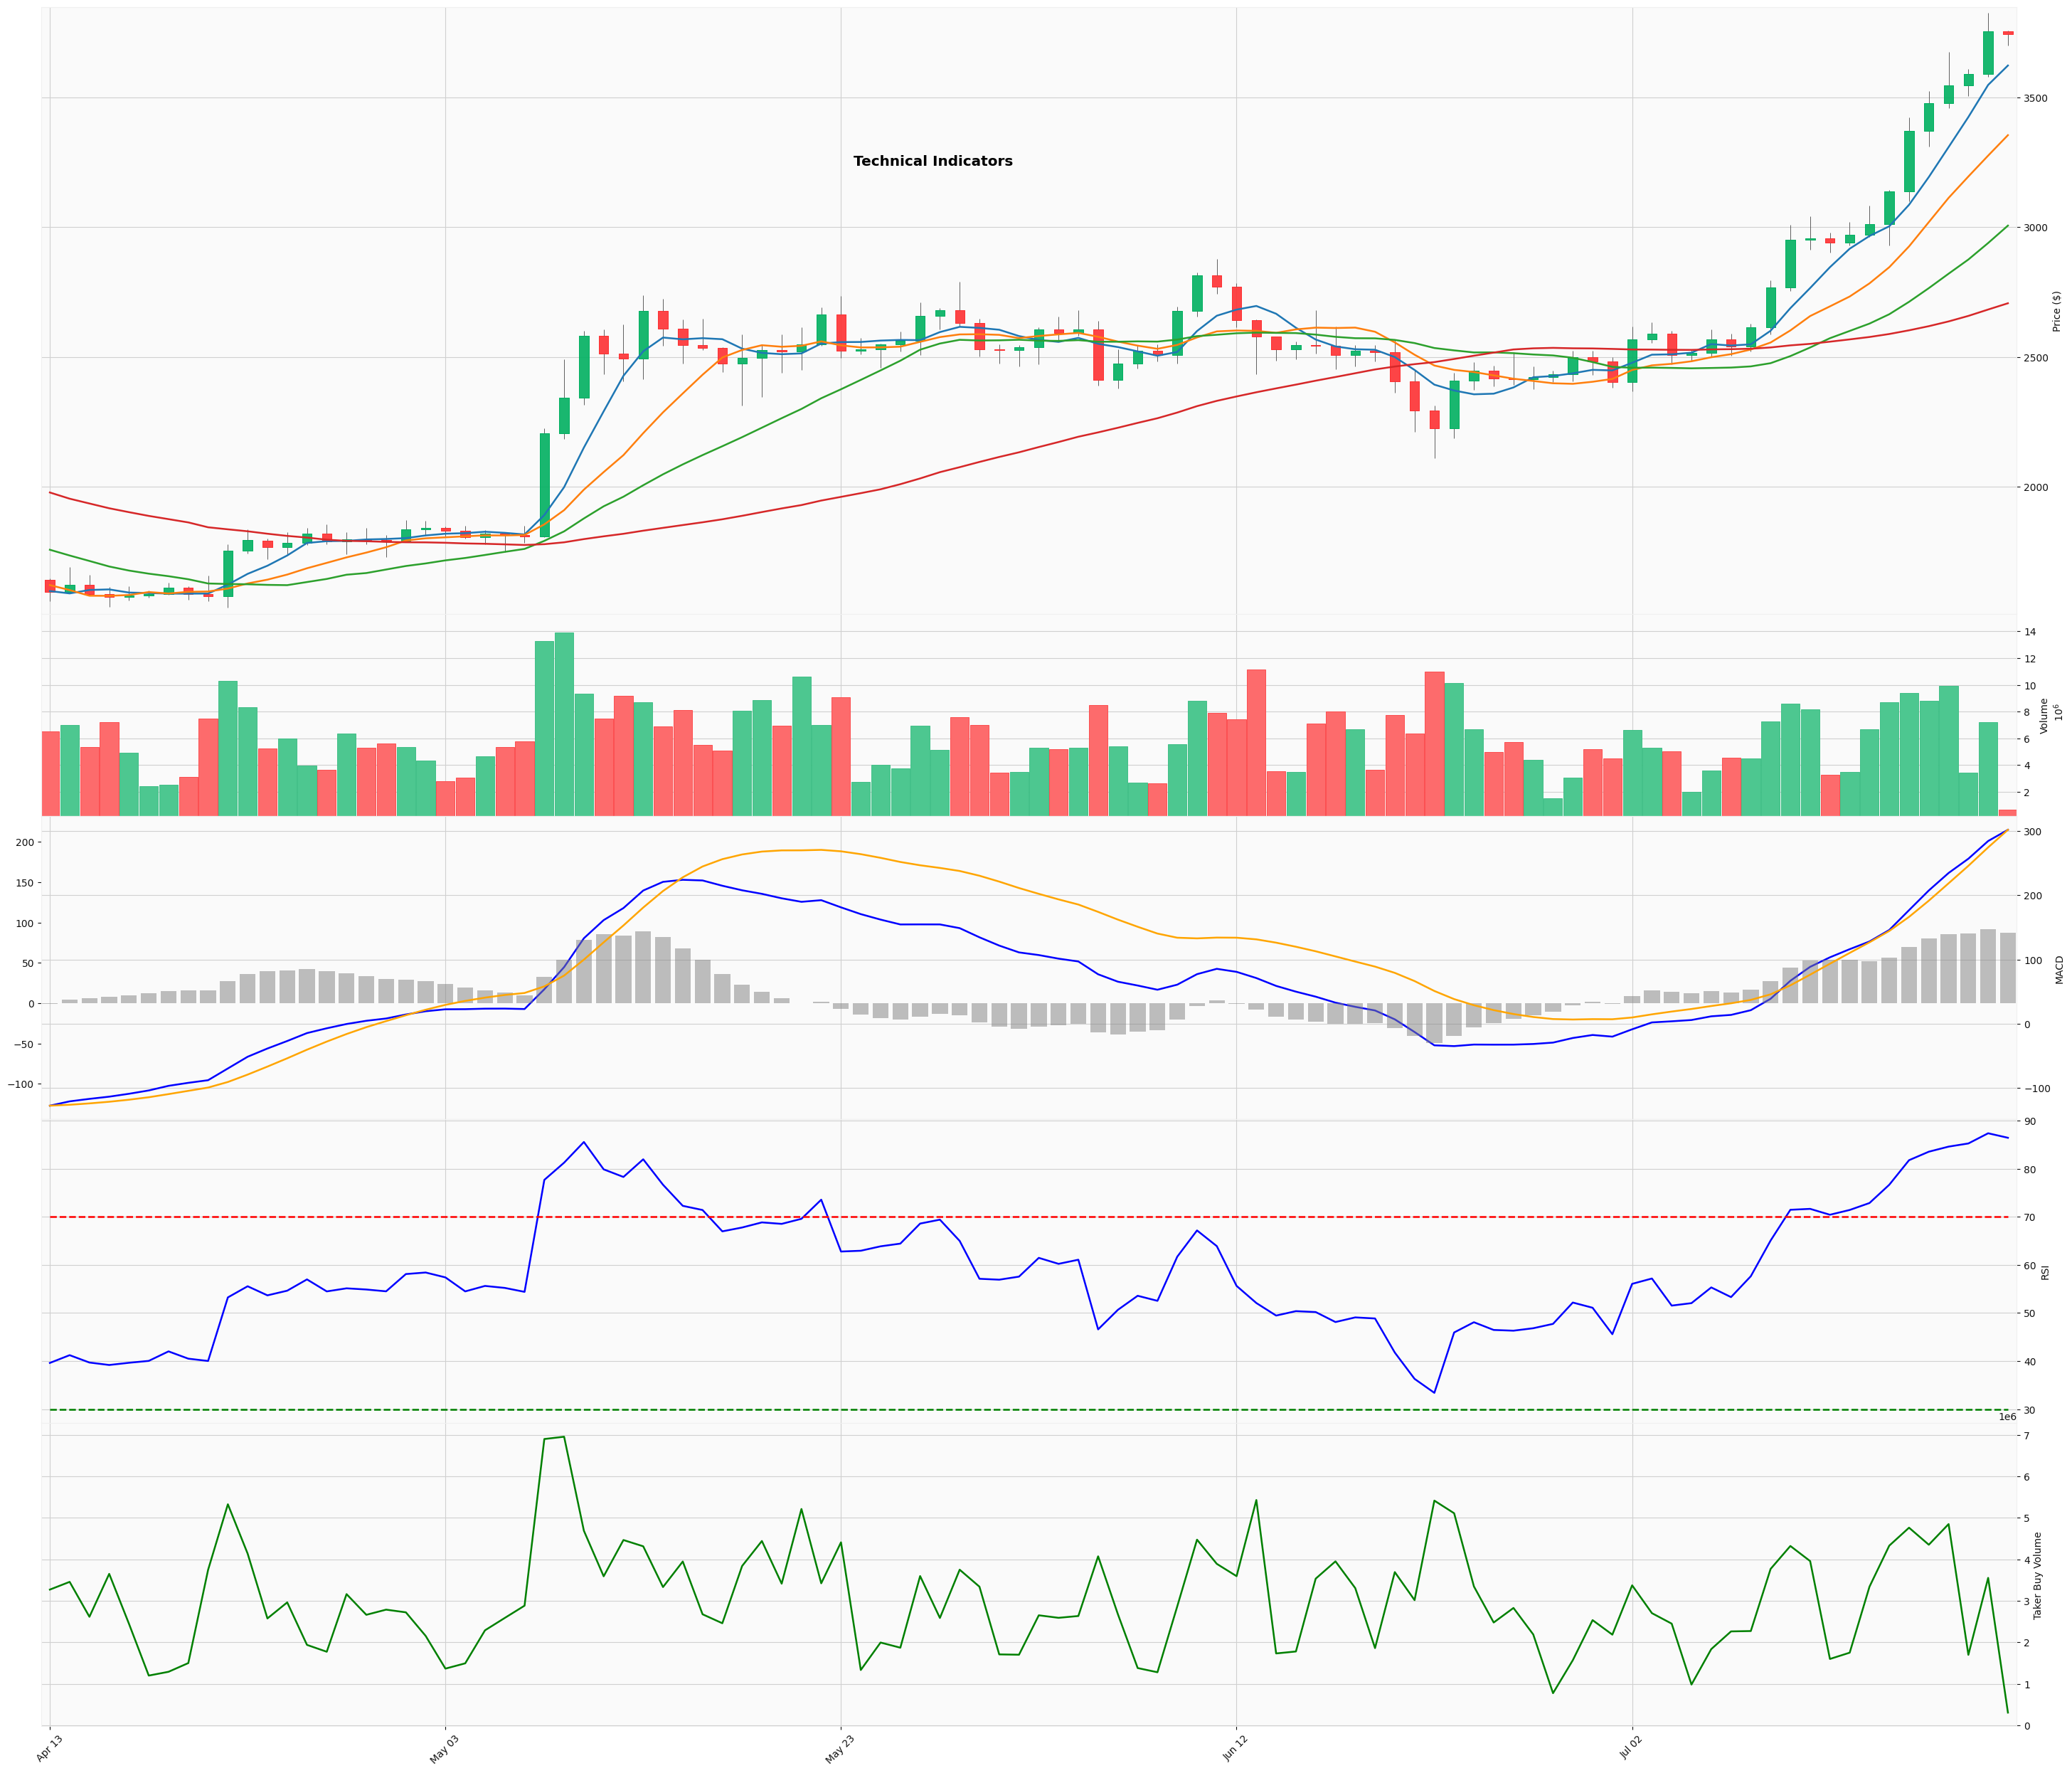

In [10]:
config = PlotConfig(
    indicators=["macd", "rsi", "adx", "taker_buy"],
    sma_periods=(5, 10, 20, 50), # 绘制SMA线
    limit=100,
)
plot_candlestick_with_indicators(df_with_indicators, config=config)